In [1]:
import pandas as pd

In [30]:
weather = pd.read_csv('weather.csv',index_col='DATE')

In [31]:
#null columns in percent
#null_cols = weather.apply(pd.isnull).sum()/weather.shape[0]

#or
null_cols = weather.isna().sum()/weather.shape[0]

In [32]:
null_cols

STATION    0.000000
NAME       0.000000
ACMH       0.501478
ACSH       0.501426
AWND       0.265256
FMTM       0.475087
PGTM       0.363872
PRCP       0.000000
SNOW       0.000000
SNWD       0.000104
TAVG       0.680406
TMAX       0.000000
TMIN       0.000000
TSUN       0.998393
WDF1       0.501685
WDF2       0.498678
WDF5       0.502981
WDFG       0.734484
WDFM       0.999948
WESD       0.685228
WSF1       0.501530
WSF2       0.498678
WSF5       0.503033
WSFG       0.613055
WSFM       0.999948
WT01       0.630217
WT02       0.935034
WT03       0.933271
WT04       0.982579
WT05       0.981127
WT06       0.990615
WT07       0.994400
WT08       0.796962
WT09       0.992741
WT11       0.999274
WT13       0.886711
WT14       0.954010
WT15       0.997822
WT16       0.658993
WT17       0.996889
WT18       0.939493
WT21       0.999741
WT22       0.997459
WV01       0.999948
dtype: float64

In [33]:
#columns with less than 5% of null cols
valid_cols = weather.columns [null_cols<0.05]
valid_cols

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [34]:
weather = weather[valid_cols].copy()
# Using copy function to avoid a warning for copying a dataframe

In [35]:
weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,,
1/1/1970,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1/2/1970,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1/3/1970,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1/4/1970,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1/5/1970,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
10/17/2022,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54
10/18/2022,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48
10/19/2022,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43


In [36]:
#filling null values with previous row's value
weather= weather.ffill()

In [37]:
weather.isnull().sum()

STATION    0
NAME       0
PRCP       0
SNOW       0
SNWD       0
TMAX       0
TMIN       0
dtype: int64

In [38]:
weather.dtypes

STATION     object
NAME        object
PRCP       float64
SNOW       float64
SNWD       float64
TMAX         int64
TMIN         int64
dtype: object

In [39]:
weather.index

Index(['1/1/1970', '1/2/1970', '1/3/1970', '1/4/1970', '1/5/1970', '1/6/1970',
       '1/7/1970', '1/8/1970', '1/9/1970', '1/10/1970',
       ...
       '10/12/2022', '10/13/2022', '10/14/2022', '10/15/2022', '10/16/2022',
       '10/17/2022', '10/18/2022', '10/19/2022', '10/20/2022', '10/21/2022'],
      dtype='object', name='DATE', length=19287)

In [40]:
#converting index date column to datetime type
weather.index = pd.to_datetime(weather.index)

In [41]:
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21'],
              dtype='datetime64[ns]', name='DATE', length=19287, freq=None)

In [42]:
weather.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
           dtype='int64', name='DATE', length=19287)

In [43]:
weather.index.year.value_counts().sort_index()
#to check all values for all days in a year are available

1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    294
Name: DATE, dtype: int64

<Axes: xlabel='DATE'>

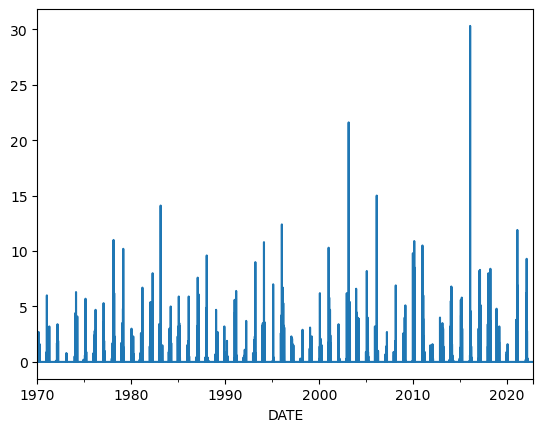

In [44]:
weather['SNOW'].plot()

In [45]:
weather['target'] = weather.shift(-1)['TMAX']
# by default, rows are shifted. 'tmax' column considered to shift to get the next day temp column.

In [87]:
weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,target,rolling_3_TMAX,rolling_3_TMAX_pct,...,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct,month_avg_TMAX,day_avg_TMAX,month_avg_TMIN,day_avg_TMIN,month_avg_PRCP,day_avg_PRCP
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29,13,36.0,29.666667,-0.022472,...,18.857143,-0.310606,0.022857,-1.000000,29.000000,29.000000,13.000000,13.000000,0.000000,0.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,21,43.0,30.333333,0.186813,...,18.785714,0.117871,0.022857,-1.000000,32.500000,36.000000,17.000000,21.000000,0.000000,0.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43,30,42.0,36.000000,0.194444,...,19.142857,0.567164,0.022857,-0.125000,36.000000,43.000000,21.333333,30.000000,0.006667,0.020000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42,25,25.0,40.333333,0.041322,...,19.285714,0.296296,0.030000,2.333333,37.500000,42.000000,22.250000,25.000000,0.030000,0.100000
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25,16,24.0,36.666667,-0.318182,...,18.928571,-0.154717,0.030000,-1.000000,35.000000,25.000000,21.000000,16.000000,0.024000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0,67.000000,0.000000,...,50.785714,0.063291,0.233571,-0.657492,64.843462,63.490566,50.225905,48.962264,0.115316,0.114151
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0,63.666667,-0.089005,...,50.857143,-0.056180,0.135000,-1.000000,64.839264,63.962264,50.224540,48.943396,0.115245,0.077170
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0,60.333333,-0.071823,...,50.000000,-0.140000,0.095714,-1.000000,64.833844,62.056604,50.220110,48.132075,0.115175,0.117547


In [47]:
weather = weather.ffill()
#filling the last row of 'target' with previous row's value

In [48]:
from sklearn.linear_model import Ridge

In [49]:
rr = Ridge(alpha = 0.1)# default is 0.1, controls how much the coefficients are shrunk of the variables.

In [50]:
predictors = weather.columns[~weather.columns.isin(['target','NAME','STATION'])]
#including all columns except the object datatype and target which is the prediction

In [51]:
predictors

Index(['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [52]:
# With timeseries data, cross validation is not encouraged. We cannot predict the past from the future
# Due to this, we are creating a function to use the first 10 years(3650 days) data to predict next 10
def backtest(weather, model, predictors, start = 3650, step = 90):
    all_preds = [] # this will have all the predictions for every 90 days
    
    for i in range(start, weather.shape[0], step): #predicting every 90 days
        train = weather.iloc[:i,:] # Training with the (every)last 10 years(3650 days)
        test = weather.iloc[i:(i+step),:] # Testing
        
        #print(test['target'])
        
        model.fit(train[predictors],train['target']) # fitting the model with training data
        
        preds = model.predict(test[predictors]) # predicting, results in a numpy array
        
        preds = pd.Series(preds, index=test.index) # Converting into a Series
        combined_preds = pd.concat([test['target'],preds],axis=1) # a dataframe, adding into 2 columns, axis=1 will concatenate into 2 columns
        
        combined_preds.columns = ['actual','predicted'] #Naming the columns
        
        combined_preds['diff'] = (combined_preds['predicted'] - combined_preds['actual']).abs()
        
        all_preds.append(combined_preds) # adding each prediction to the list
    return pd.concat(all_preds,axis=0)# concatenation of all predictions, axis=0(default) concatenates into multiple rows, one after the other
        

In [53]:
predictions = backtest(weather, rr, predictors)

In [54]:
predictions

,actual,predicted,diff
DATE,,,
1979-12-30,43.0,50.229324,7.229324
1979-12-31,42.0,43.673798,1.673798
1980-01-01,41.0,41.579150,0.579150
1980-01-02,36.0,43.961887,7.961887
1980-01-03,30.0,40.204726,10.204726
...,...,...,...
2022-10-17,58.0,67.543412,9.543412
2022-10-18,56.0,60.511771,4.511771
2022-10-19,61.0,57.030435,3.969565


In [55]:
# Using Mean absolute error to get the accuracy of our model

from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions['actual'],predictions['predicted'])

# This gives us a degree by which the prediction is off, higher or lower

5.13932667966084

In [56]:
# another way of showing mean abosolute error, as we have actual-predicted values
predictions['diff'].mean()

5.13932667966084

In [59]:
#The goal is to add more predictors , so we get less error-prone predictions

def pct_diff (old, new):
    return(new-old)/old


def compute_rolling(weather, horizon, col): # computing rolling average for a few days for better evaluation. 'horizon' - number of days you are computing average
    label = f"rolling_{horizon}_{col}"  # col name of the rolling avg column
    
    weather[label] = weather[col].rolling(horizon).mean() # if we give 14 for horizon, then 14 rows are taken and given the average
    weather[f"{label}_pct"] = pct_diff(weather[label],weather[col]) # difference between new and old cols
    return (weather)
    
rolling_horizon=[3,14]

for horizon in rolling_horizon:
    for col in ['TMAX','TMIN','PRCP']:
        weather = compute_rolling(weather, horizon, col)


In [61]:
weather = weather.iloc[14:,:] # Do not consider the first 14 rows

In [62]:
weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,target,rolling_3_TMAX,rolling_3_TMAX_pct,rolling_3_TMIN,rolling_3_TMIN_pct,rolling_3_PRCP,rolling_3_PRCP_pct,rolling_14_TMAX,rolling_14_TMAX_pct,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29,13,36.0,29.666667,-0.022472,18.000000,-0.277778,0.000000,0.0,29.857143,-0.028708,18.857143,-0.310606,0.022857,-1.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,21,43.0,30.333333,0.186813,16.666667,0.260000,0.000000,0.0,30.214286,0.191489,18.785714,0.117871,0.022857,-1.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43,30,42.0,36.000000,0.194444,21.333333,0.406250,0.006667,2.0,30.571429,0.406542,19.142857,0.567164,0.022857,-0.125000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42,25,25.0,40.333333,0.041322,25.333333,-0.013158,0.040000,1.5,31.357143,0.339408,19.285714,0.296296,0.030000,2.333333
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25,16,24.0,36.666667,-0.318182,23.666667,-0.323944,0.040000,-1.0,30.642857,-0.184149,18.928571,-0.154717,0.030000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0,67.000000,0.000000,51.000000,0.058824,0.026667,2.0,67.142857,-0.002128,50.785714,0.063291,0.233571,-0.657492
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0,63.666667,-0.089005,51.333333,-0.064935,0.026667,-1.0,67.285714,-0.138004,50.857143,-0.056180,0.135000,-1.000000
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0,60.333333,-0.071823,48.333333,-0.110345,0.026667,-1.0,67.000000,-0.164179,50.000000,-0.140000,0.095714,-1.000000


In [88]:
def expand_mean(df):
    return df.expanding(1).mean() #This basically considers that row and all the rows before it and compute average

for col in ['TMAX','TMIN','PRCP']:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys = False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)
    
#We are grouping months together and finding an average, also considering the time series as future data cannot predict 
#past, we are using expand_mean() function to only consider grouping of months till that particular year.
#For ex: If we are 2000-01-01, then only Jan's till 1999 will be considered for the average


In [89]:
weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,target,rolling_3_TMAX,rolling_3_TMAX_pct,...,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct,month_avg_TMAX,day_avg_TMAX,month_avg_TMIN,day_avg_TMIN,month_avg_PRCP,day_avg_PRCP
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29,13,36.0,29.666667,-0.022472,...,18.857143,-0.310606,0.022857,-1.000000,29.000000,29.000000,13.000000,13.000000,0.000000,0.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,21,43.0,30.333333,0.186813,...,18.785714,0.117871,0.022857,-1.000000,32.500000,36.000000,17.000000,21.000000,0.000000,0.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43,30,42.0,36.000000,0.194444,...,19.142857,0.567164,0.022857,-0.125000,36.000000,43.000000,21.333333,30.000000,0.006667,0.020000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42,25,25.0,40.333333,0.041322,...,19.285714,0.296296,0.030000,2.333333,37.500000,42.000000,22.250000,25.000000,0.030000,0.100000
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25,16,24.0,36.666667,-0.318182,...,18.928571,-0.154717,0.030000,-1.000000,35.000000,25.000000,21.000000,16.000000,0.024000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0,67.000000,0.000000,...,50.785714,0.063291,0.233571,-0.657492,64.843462,63.490566,50.225905,48.962264,0.115316,0.114151
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0,63.666667,-0.089005,...,50.857143,-0.056180,0.135000,-1.000000,64.839264,63.962264,50.224540,48.943396,0.115245,0.077170
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0,60.333333,-0.071823,...,50.000000,-0.140000,0.095714,-1.000000,64.833844,62.056604,50.220110,48.132075,0.115175,0.117547


In [90]:
predictors = weather.columns[~weather.columns.isin(['target','NAME','STATION'])]

In [91]:
predictors


Index(['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'rolling_3_TMAX',
       'rolling_3_TMAX_pct', 'rolling_3_TMIN', 'rolling_3_TMIN_pct',
       'rolling_3_PRCP', 'rolling_3_PRCP_pct', 'rolling_14_TMAX',
       'rolling_14_TMAX_pct', 'rolling_14_TMIN', 'rolling_14_TMIN_pct',
       'rolling_14_PRCP', 'rolling_14_PRCP_pct', 'month_avg_TMAX',
       'day_avg_TMAX', 'month_avg_TMIN', 'day_avg_TMIN', 'month_avg_PRCP',
       'day_avg_PRCP'],
      dtype='object')

In [92]:
predictions = backtest(weather, rr, predictors)

In [93]:
mean_absolute_error(predictions['actual'],predictions['predicted'])

4.792510527138961

In [94]:
# We can see the error value is lower with more predictors
# We will sort the 'diff' and check where we are having high errors
predictions.sort_values('diff', ascending = False)

,actual,predicted,diff
DATE,,,
1990-03-12,85.0,54.361065,30.638935
2007-03-26,78.0,49.965413,28.034587
1998-03-26,80.0,51.966675,28.033325
2003-04-15,86.0,59.432179,26.567821
1985-04-18,84.0,58.425960,25.574040
...,...,...,...
1987-09-16,75.0,75.001185,0.001185
1984-08-10,83.0,82.999179,0.000821
2011-09-25,78.0,77.999237,0.000763


In [84]:
# Let's see 1990-03-12 specifically to see why the big difference in prediction
weather.loc['1990-03-12':'1990-03-18']
#See the TMAX col of days around Mar 12, we can see there is one day where temp is really high of 85 and other days
#between 50-60, this is why the big temperature change on 1990-03-12, as we use previous days to predict the next days temp


,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,target,rolling_3_TMAX,rolling_3_TMAX_pct,...,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct,month_avg_TMAX,day_avg_TMAX,month_avg_TMIN,day_avg_TMIN,month_avg_PRCP,day_avg_PRCP
DATE,,,,,,,,,,,,,,,,,,,,,
1990-03-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,59,43,85.0,55.000000,0.072727,...,27.928571,0.539642,0.021429,-1.000000,48.596519,48.142857,34.566456,34.285714,0.118576,0.167619
1990-03-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,41,62.0,67.666667,0.256158,...,29.500000,0.389831,0.020000,-1.000000,48.654028,48.761905,34.576619,34.285714,0.118389,0.091429
1990-03-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,62,46,55.0,68.666667,-0.097087,...,30.857143,0.490741,0.020000,-1.000000,48.675079,50.190476,34.594637,36.809524,0.118202,0.259524
1990-03-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,55,43,62.0,67.333333,-0.183168,...,32.214286,0.334812,0.020000,-1.000000,48.685039,49.714286,34.607874,35.761905,0.118016,0.066667
1990-03-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,62,48,61.0,59.666667,0.039106,...,33.428571,0.435897,0.020000,-1.000000,48.705975,50.095238,34.628931,35.619048,0.117830,0.083810
1990-03-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.26,0.0,0.0,61,49,59.0,59.333333,0.028090,...,34.357143,0.426195,0.038571,5.740741,48.725275,48.095238,34.651491,34.619048,0.118053,0.079048
1990-03-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.39,0.0,0.0,59,47,53.0,60.666667,-0.027473,...,35.928571,0.308151,0.066429,4.870968,48.741379,47.238095,34.670846,34.285714,0.118480,0.188095


<Axes: >

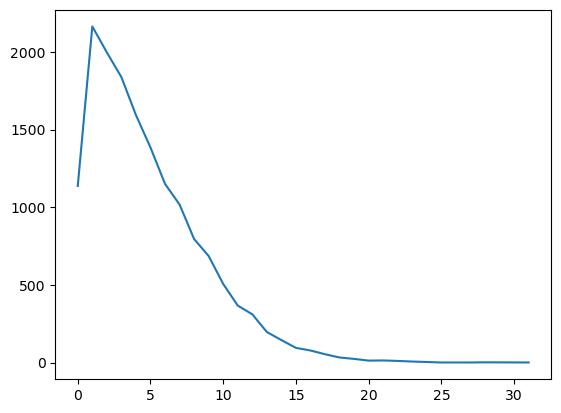

In [77]:
predictions['diff'].round().value_counts().sort_index().plot()
# Mean error plot